# Task 1: Import the adult dataset from the ucimlrepo

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd

In [3]:
data_url = 'https://raw.githubusercontent.com/rubaomari/data/main/adult/adult-all.txt'

In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country']

In [5]:
# Read CSV data into DataFrame
# Read "income" into goal
df = pd.read_csv(data_url, names=column_names, usecols=range(14))
goal = pd.read_csv(data_url, names=["income"], usecols=[14])

# Task 2: Take a quick look at the data structure (i.e., X) using .head(), .info(), .describe(), and .shape.

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(48842, 14)

## Task 2.1: Plot a histogram of the data.

In [10]:
# install matplotlib
!pip install matplotlib

In [11]:
# import pyplot module
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

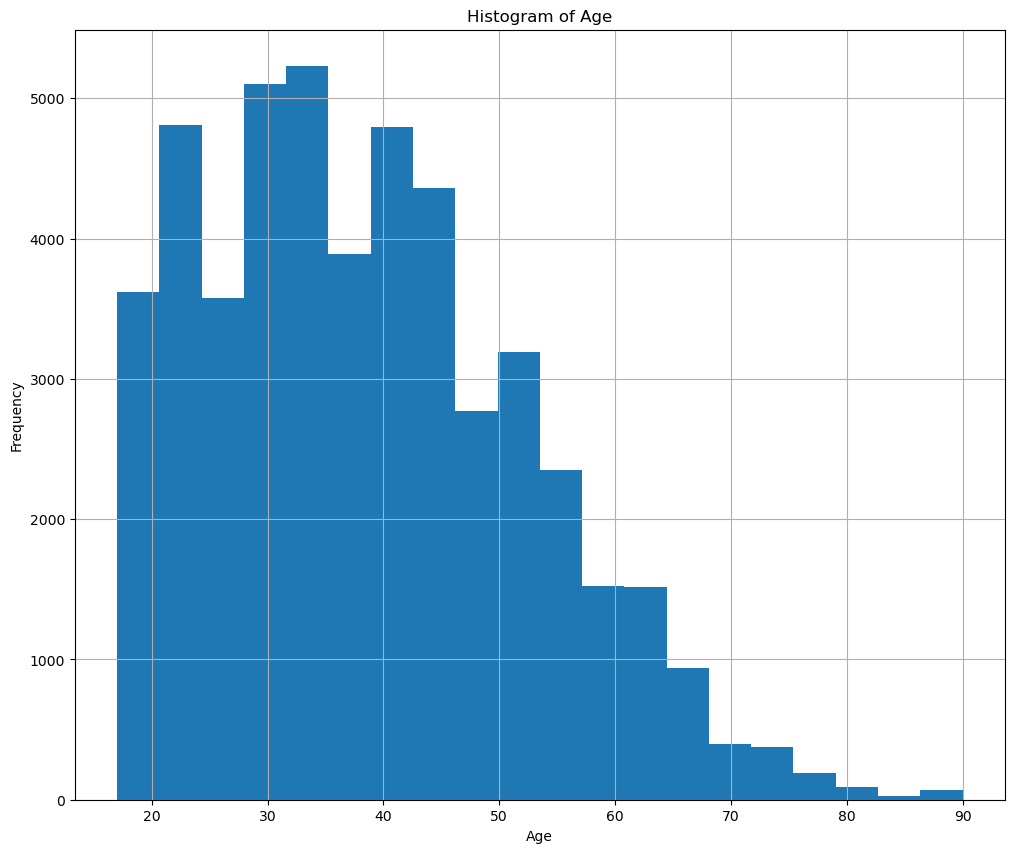

In [12]:
#set the graph size
plt.rcParams["figure.figsize"] = (12,10)
df['age'].hist(bins=20)
#Set titles and axis labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Change "age" in df['age'] to other column_names then could check other histogram

# Task 3: There are missing values in this dataset that are entered as ?, check for the number of these missing values. 

In [13]:
# Check the number of ' ?'
missing_values = (df == ' ?').sum()
print(missing_values)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


# Task 4: Replace the missing values you found in the previous step with null (nan). Run a X.info() to see the non-null count. 

In [14]:
import numpy as np
# Replace ' ?' with NaN
df.replace(' ?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


# Task 5: Create and apply a preprocessing pipeline to:
## 1. Fill in the missing numerical values with the mean using a SimpleImputer.
## 2. Scale the numerical columns using StandardScaler. Do not scale the target.
## 3. Fill in the missing categorical values with the most_frequent value using SimpleImputer.
## 4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
## - Display your pipeline.
## - Print X_prepared.shape.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate features and target
X = df
y = goal

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing pipeline
X_prepared = preprocessor.fit_transform(X)


print(preprocessor)
print(X_prepared.shape)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])
(48842, 105)


C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

# Task 6: Check the target value_counts. You will notice that the target needs some data cleaning.

In [16]:
# Check the value counts of the target
print(goal['income'].value_counts())

# Data cleaning steps

# Strip leading/trailing spaces and convert to lower case
goal['income'] = goal['income'].str.strip().str.lower()

# Check the value counts again
print(goal['income'].value_counts())

income
 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: count, dtype: int64
income
<=50k     24720
<=50k.    12435
>50k       7841
>50k.      3846
Name: count, dtype: int64


# Task 7: Remove the period at the end of the >50K. and <=50K. i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K 
## Run the value_counts again.

In [17]:
# replace "." with ""
goal['income'] = goal['income'].str.replace(".", "")
print(goal['income'].value_counts())

income
<=50k    37155
>50k     11687
Name: count, dtype: int64


# Task 8: Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

In [18]:
from sklearn.model_selection import train_test_split

X = X_prepared
y = goal['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073,) (9769, 105) (9769,)


# Task 9: Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model model_svm.

In [19]:
from sklearn.svm import SVC
# Create the svm model
model_svm = SVC(kernel='poly', C=0.1, gamma=1)

#I got "AttributeError: 'numpy.ndarray' object has no attribute 'iloc'" when I used the code on pdf
# found this for numpy arrays
model_svm.fit(X_train[:10000], y_train[:10000])

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(C=0.1, gamma=1, kernel='poly')

## Task 9.1: Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [20]:
from sklearn.metrics import classification_report

# Use the model to make predictions on the test set
y_predict = model_svm.predict(X_test)

# Generate and print
report = classification_report(y_test, y_predict)
print(report)

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklear

              precision    recall  f1-score   support

       <=50k       0.87      0.89      0.88      7414
        >50k       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



## Task 9.2: Display the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklear

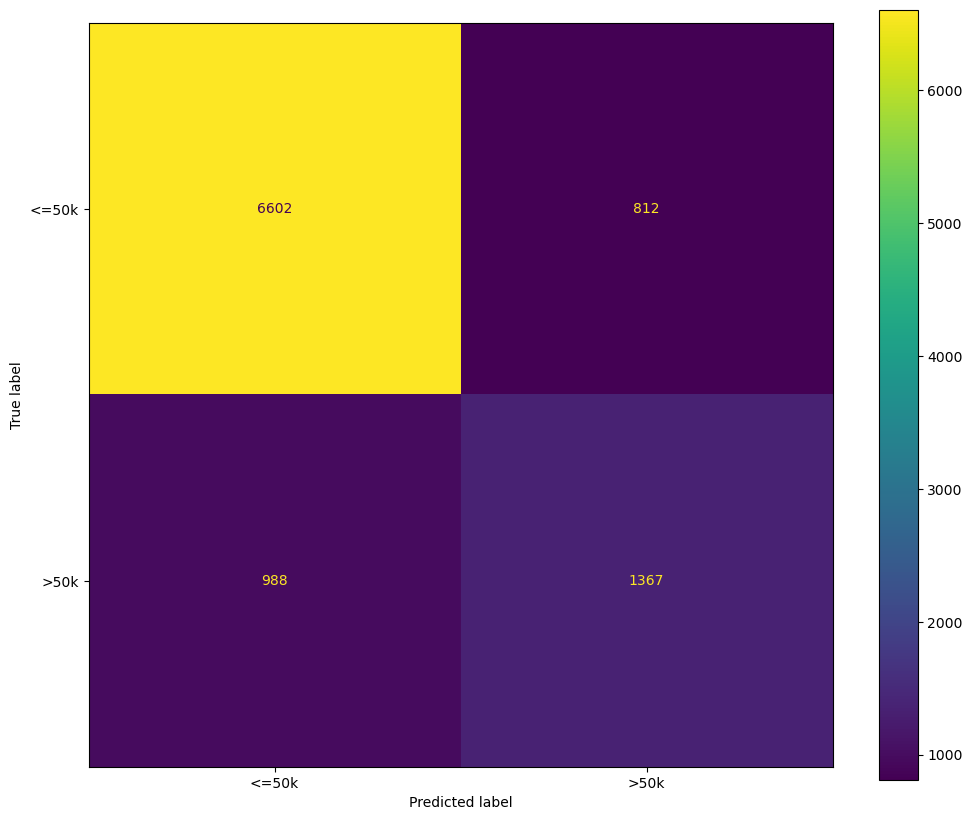

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Task 10 (10 Marks): Use GridSearchCV to find the best value of kernel, gamma, and C.
## Task 10.1: Split the dataset into 60% training, 20% validation, and 20% testing. Use the code below to perform the split:

In [22]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)


(29305, 105) (29305,) (9768, 105) (9768,) (9769, 105) (9769,)


## Task 10.2: Use the below code snippet to pass the following hyperparameters for the GridSearchCV to find the best ones:
## Check the svm winner parameters using svm_winner

In [23]:
# code author luisguiserrano
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_parameters = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 1, 10]
}

svm = SVC()

svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)
# I changed this line since the same error AttributeError
svm_gs.fit(X_train[:10000], y_train[:10000].ravel())

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

print(svm_winner)
# Check the winning
print("Best parameters found by GridSearchCV:")
print(svm_gs.best_params_)

# Replace X_validation and y_validation
score = svm_winner.score(X_validation, y_validation)
print("Validation score of the best estimator:", score)

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklear

SVC(C=10, gamma=0.01)
Best parameters found by GridSearchCV:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Validation score of the best estimator: 0.8472563472563472


C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklear